# Loan Analysis Task

For loan analysis, we have three datasets which are loan.csv, clarity_underwriting_variables.csv and repayment.csv.

## Importing the data

In [3]:
import pandas as pd
import numpy as np

In [4]:
data_loan = pd.read_csv("loan.csv")
data_loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [5]:
data_clarity = pd.read_csv("clarity_underwriting_variables.csv")
data_clarity.head(5)

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


In [2]:
data_payment = pd.read_csv("payment.csv")
data_payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


## Checking and cleaning missing values

In [65]:
data_loan.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

In [66]:
data_clarity.columns

Index(['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentw

In [3]:
data_payment.columns

Index(['loanId', 'installmentIndex', 'isCollection', 'paymentDate',
       'principal', 'fees', 'paymentAmount', 'paymentStatus',
       'paymentReturnCode'],
      dtype='object')

- We can find out about the details of applications from loan dataset

- Underwriting dataset is about the variables that the underwriter will look at to give the applicants' final fraud score

-  Payment dataset is about loan repayment details of the applicants.

In [6]:
print('Length of loan data:',len(data_loan))
print('Length of underwriting data:',len(data_clarity))
print('Length of payment data: ', len(data_payment))

Length of loan data: 577682
Length of underwriting data: 49752
Length of payment data:  689364


- We will change the name of several important columns from the underwriting dataset which are clarity time and day, fraud indicator, overall match code and fraud score. It will be easy to read.

In [68]:
mapping = {data_clarity.columns[0]: 'q30d', data_clarity.columns[1]: 'q24h', data_clarity.columns[2]:'q1m',data_clarity.columns[3]: 'q1h',
          data_clarity.columns[4]: 'q90d', data_clarity.columns[5]:'q7d', data_clarity.columns[6]:'q10m', data_clarity.columns[7]: 'q15d',
          data_clarity.columns[8]: 'q365d', data_clarity.columns[10]: 'total_fraud_indicator', data_clarity.columns[-3]:'overall_match_code'}
data_clarity = data_clarity.rename(columns=mapping)
data_clarity.head(5)

,q30d,q24h,q1m,q1h,q90d,q7d,q10m,q15d,q365d,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,overall_match_code,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


- We will find the percentage of missing values in each column of underwriting data, loan data and payment data. We will drop the columns that have more than 50% missing values and unimportant columns.

In [69]:
((data_loan.isnull() | data_loan.isna()).sum() * 100 / data_loan.index.size).round(2)

loanId                               0.04
anon_ssn                             0.00
payFrequency                         0.22
apr                                  0.68
applicationDate                      0.00
originated                           0.00
originatedDate                      92.03
nPaidOff                             0.00
approved                             0.00
isFunded                             0.00
loanStatus                           0.07
loanAmount                           0.39
originallyScheduledPaymentAmount     0.00
state                                0.02
leadType                             0.00
leadCost                             0.00
fpStatus                            91.05
clarityFraudId                      38.08
hasCF                                0.00
dtype: float64

In [70]:
((data_clarity.isnull() | data_clarity.isna()).sum() * 100 / data_clarity.index.size).round(2)

q30d                                                                                                    0.00
q24h                                                                                                    0.00
q1m                                                                                                     0.00
q1h                                                                                                     0.00
q90d                                                                                                    0.00
q7d                                                                                                     0.00
q10m                                                                                                    0.00
q15d                                                                                                    0.00
q365d                                                                                                   0.00
.underwritingdatacl

In [7]:
((data_payment.isnull() | data_payment.isna()).sum() * 100 / data_payment.index.size).round(2)

loanId                0.00
installmentIndex      0.00
isCollection          0.00
paymentDate           0.00
principal             0.00
fees                  0.00
paymentAmount         0.00
paymentStatus         0.00
paymentReturnCode    95.43
dtype: float64

In [71]:
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone'],axis = 1)
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone'],axis = 1)
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode'],axis = 1)
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode'],axis = 1)
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode'],axis = 1)
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype'],axis = 1)
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription'],axis = 1)
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncodedescription'],axis = 1)
data_clarity = data_clarity.drop(['.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile'],axis = 1)

In [72]:
data_loan = data_loan.drop(['anon_ssn'],axis = 1)
data_loan = data_loan.drop(['applicationDate'],axis = 1)
data_loan = data_loan.drop(['originatedDate'],axis = 1)
data_loan = data_loan.drop(['fpStatus'],axis = 1)

In [8]:
data_payment = data_payment.drop(['paymentReturnCode'],axis = 1)
data_payment = data_payment.drop(['paymentDate'],axis = 1)

In [73]:
df_clarity = data_clarity.dropna( axis=0, inplace=True)
df_clarity = data_clarity.reset_index(drop=True)

In [74]:
df_loan = data_loan.dropna( axis=0, inplace=True)
df_loan = data_loan.reset_index(drop=True)

- Then, we will create a new data frame from the underwriting dataset to keep only important columns.

In [75]:
data_underwriting = df_clarity[['underwritingid','q1m','q10m','q1h','q24h','q7d','q15d','q30d','q90d','q365d','total_fraud_indicator',
                      'overall_match_code','clearfraudscore']]

In [76]:
data_underwriting.head(3)

,underwritingid,q1m,q10m,q1h,q24h,q7d,q15d,q30d,q90d,q365d,total_fraud_indicator,overall_match_code,clearfraudscore
0,557ee97de4b0fa07f55851c9,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,2.0,2.0,821.0
1,557ef7e4e4b0fa07f565709a,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,9.0,3.0,2.0,851.0
2,557efe51e4b0fa07f56ca34d,3.0,3.0,3.0,3.0,3.0,3.0,3.0,21.0,24.0,2.0,1.0,790.0


In [77]:
df_loan.head(3)

,loanId,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,clarityFraudId,hasCF
0,LL-I-07399092,B,360.0,False,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,B,199.0,True,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,B,590.0,False,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,579eab11e4b0d0502870ef2f,1


- We will save the clean underwriting, loan and payment data into csv file.

In [9]:
# df_loan.to_csv("clean_loan_data.csv", index=False)
# data_underwriting.to_csv("clean_underwriting_data.csv", index=False)
#data_payment.to_csv("clean_payment_data.csv", index=False)

## Exploring the data

## 1) Loan Applications

First, we will look at details of applicants in application data.

In [4]:
df_loan = pd.read_csv("clean_loan_data.csv")

In [86]:
df_loan.shape

(354935, 15)

In [90]:
df_loan.select_dtypes(include=['object', 'bool']).columns

Index(['loanId', 'payFrequency', 'originated', 'approved', 'loanStatus',
       'state', 'leadType', 'clarityFraudId'],
      dtype='object')

In [4]:
df_loan.select_dtypes(include=['int', 'float']).columns

Index(['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount'], dtype='object')

We will plot 'payFrequency', 'originated', 'approved' and 'loanStatus'

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

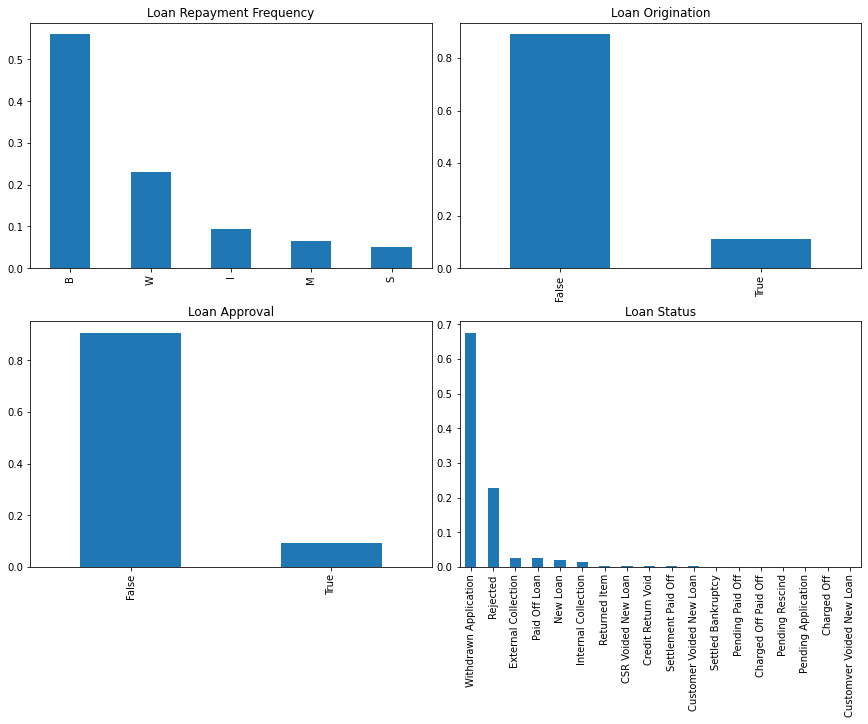

In [91]:
plt.subplot(221)
df_loan.payFrequency.value_counts(normalize=True).plot(kind = 'bar', title = "Loan Repayment Frequency",figsize=(12,10))
plt.tight_layout(pad=0.5)

plt.subplot(222)
df_loan.originated.value_counts(normalize=True).plot(kind = 'bar', title = "Loan Origination")
plt.tight_layout(pad=0.5)

plt.subplot(223)
df_loan.approved.value_counts(normalize=True).plot(kind = 'bar',title = "Loan Approval")
plt.tight_layout(pad=0.5)

plt.subplot(224)
df_loan.loanStatus.value_counts(normalize=True).plot(kind = 'bar',title = "Loan Status")
plt.tight_layout(pad=0.5)

Insight:

- Nearly 60% of the applicants prefer to make loan repayment biweekly.

- Nearly 85% - 90% loan applications had being process.

- The bank did not approve almost 90% of the loan applicantions.

- About 68% of applicants withdrawn their application.

We will plot the loan amounts using the histogram and group loan amounts into three groups which are low amount, medium amount, and high amount.

In [47]:
bins = np.linspace(min(df_loan["loanAmount"]), max(df_loan["loanAmount"]), 4)
bins

array([   0.        , 1666.66666667, 3333.33333333, 5000.        ])

In [48]:
group = ['Low', 'Medium', 'High']
df_loan['loanAmount-binned'] = pd.cut(df_loan['loanAmount'], bins, labels=group, include_lowest=True )
df_loan[['loanAmount','loanAmount-binned']].head(5)

,loanAmount,loanAmount-binned
0,500.0,Low
1,3000.0,Medium
2,400.0,Low
3,500.0,Low
4,350.0,Low


Text(0.5, 1.0, 'Loan Amount Bins')

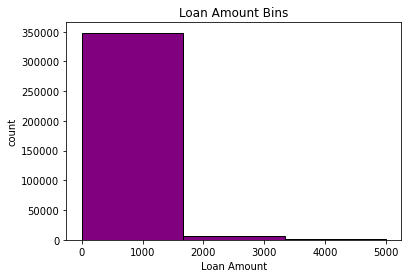

In [49]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of loan amount with bins = 3
plt.pyplot.hist(df_loan["loanAmount"], bins = 3,color='purple',edgecolor='black')

# set x/y labels and plot title
plt.pyplot.xlabel("Loan Amount")
plt.pyplot.ylabel("count")
plt.pyplot.title("Loan Amount Bins")

In [50]:
print((df_loan["loanAmount-binned"].value_counts())/len(df_loan["loanAmount-binned"])*100)

Low       98.124164
Medium     1.720033
High       0.155803
Name: loanAmount-binned, dtype: float64


Insight:

- 98% of applicants got loan amount less than 1666 (low) and only 0.16% got loan amount more than 3333 (high).

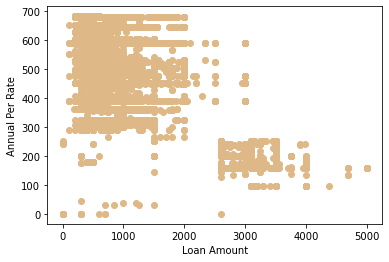

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df_loan['loanAmount'], df_loan['apr'], c = 'burlywood')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Per Rate')
plt.show()

<AxesSubplot:xlabel='loanAmount', ylabel='apr'>

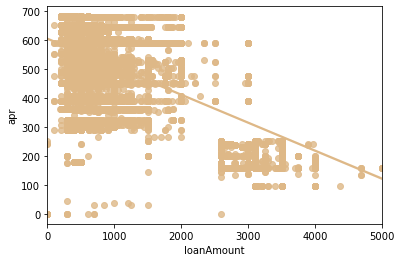

In [7]:
import seaborn as sns

sns.regplot(x="loanAmount", y="apr", data=df_loan, color="burlywood")

In [ ]:
 - From the

## 2) Not Approved Group

From the loan approval plot, we find out that almost 90% of applicants did not get loan approval. Then, we will find out more about a not approved group.

In [92]:
print(df_loan["approved"].value_counts())

False    321600
True      33335
Name: approved, dtype: int64


In [93]:
grouped = df_loan.groupby('approved')
not_approved = grouped.get_group(False)

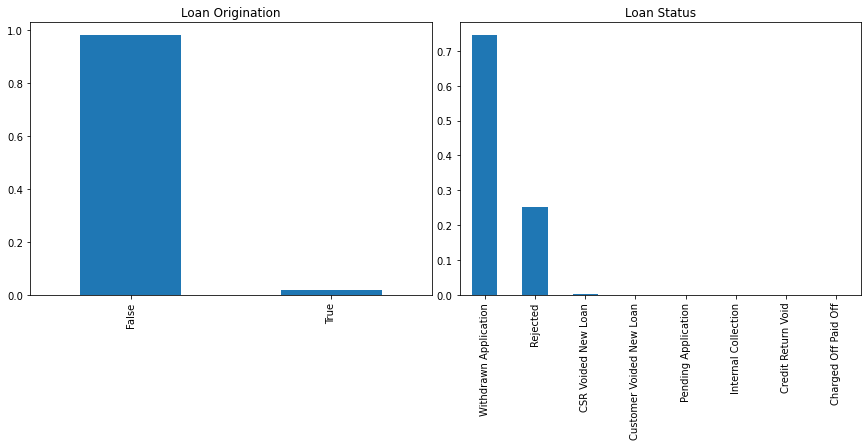

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(221)
not_approved.originated.value_counts(normalize=True).plot(kind = 'bar', title = "Loan Origination",figsize=(12,10))
plt.tight_layout(pad=0.5)

plt.subplot(222)
not_approved.loanStatus.value_counts(normalize=True).plot(kind = 'bar',title = "Loan Status")
plt.tight_layout(pad=0.5)


Insight:

- More than 90% of applicantions did not originate from a not approved group.

-  About 80% of applicants from a not approved group were withdrawn their applications

The, we will look how many loans from not approved group has paid off in the past:

- We group the applicants' number loan paid off into two groups which are low and high numbers.

In [98]:
bins = np.linspace(min(not_approved["nPaidOff"]), max(not_approved["nPaidOff"]), 3)
bins

array([ 0., 10., 20.])

In [99]:
group = ['Low','High']
not_approved['nPaidOff-binned'] = pd.cut(not_approved['nPaidOff'], bins, labels=group, include_lowest=True )
not_approved[['nPaidOff','nPaidOff-binned']].head(5)

<ipython-input-99-38fe20e2b0d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_approved['nPaidOff-binned'] = pd.cut(not_approved['nPaidOff'], bins, labels=group, include_lowest=True )


,nPaidOff,nPaidOff-binned
0,0.0,Low
2,0.0,Low
3,0.0,Low
4,0.0,Low
5,0.0,Low


Text(0.5, 1.0, 'nPaidOff of Not Approved Group')

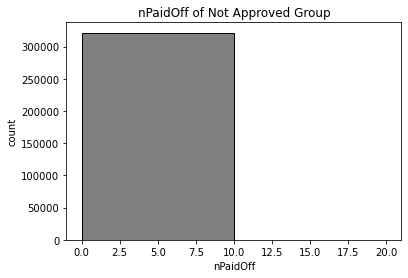

In [100]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

plt.pyplot.hist(not_approved["nPaidOff"], bins = 2,color='grey',edgecolor='black')

plt.pyplot.xlabel("nPaidOff")
plt.pyplot.ylabel("count")
plt.pyplot.title("nPaidOff of Not Approved Group")

In [102]:
print((not_approved['nPaidOff-binned'].value_counts())/len(not_approved['nPaidOff-binned'])*100)

Low     99.999067
High     0.000933
Name: nPaidOff-binned, dtype: float64


Insight:

- 99.9% of applicants' from not approved group had paid off 10 loans in the past.

## 3) Underwriting Process

- We combine two dataset, loan and underwriting dataset, into one data to look at details of applicants underwriting process. 

- Data merging is the process of combining two or more data sets into a single data set. Most often, this process is necessary when you have raw data stored in multiple files, worksheets, or data tables, that you want to analyze all in one go.

- Merging data to look at loan applications and underwriting in one data frame, which the loan had been processed in underwriting process.

In [10]:
df_underwriting = pd.read_csv("clean_underwriting_data.csv")

In [11]:
data = pd.merge(df_loan, df_underwriting, left_on="clarityFraudId", right_on="underwritingid")

In [12]:
data.columns

Index(['loanId', 'payFrequency', 'apr', 'originated', 'nPaidOff', 'approved',
       'isFunded', 'loanStatus', 'loanAmount',
       'originallyScheduledPaymentAmount', 'state', 'leadType', 'leadCost',
       'clarityFraudId', 'hasCF', 'underwritingid', 'q1m', 'q10m', 'q1h',
       'q24h', 'q7d', 'q15d', 'q30d', 'q90d', 'q365d', 'total_fraud_indicator',
       'overall_match_code', 'clearfraudscore'],
      dtype='object')

In [14]:
data = data.drop(['underwritingid'],axis = 1)
data = data.drop(['clarityFraudId'],axis = 1)

In [21]:
data = data.drop(['hasCF'],axis = 1)

In [22]:
#data.to_csv("merge_loan_application.csv", index=False)

In [15]:
data.head(3)

,loanId,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,q1h,q24h,q7d,q15d,q30d,q90d,q365d,total_fraud_indicator,overall_match_code,clearfraudscore
0,LL-I-17826953,W,645.0,True,0.0,True,1,New Loan,400.0,1364.87,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,1.0,658.0
1,LL-I-16519347,S,490.0,True,2.0,True,1,Paid Off Loan,1250.0,3313.78,...,4.0,4.0,4.0,4.0,4.0,5.0,10.0,1.0,6.0,835.0
2,LL-I-17491287,S,490.0,True,3.0,True,1,Paid Off Loan,1250.0,3112.16,...,4.0,4.0,4.0,4.0,4.0,5.0,10.0,1.0,6.0,835.0


In [112]:
data.shape

(31827, 28)

In [113]:
df_loan.shape

(354935, 15)

In [49]:
(len(data)/len(df_loan))*100

8.966993956639948

- Only 8.97% applications underwent underwriting process.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

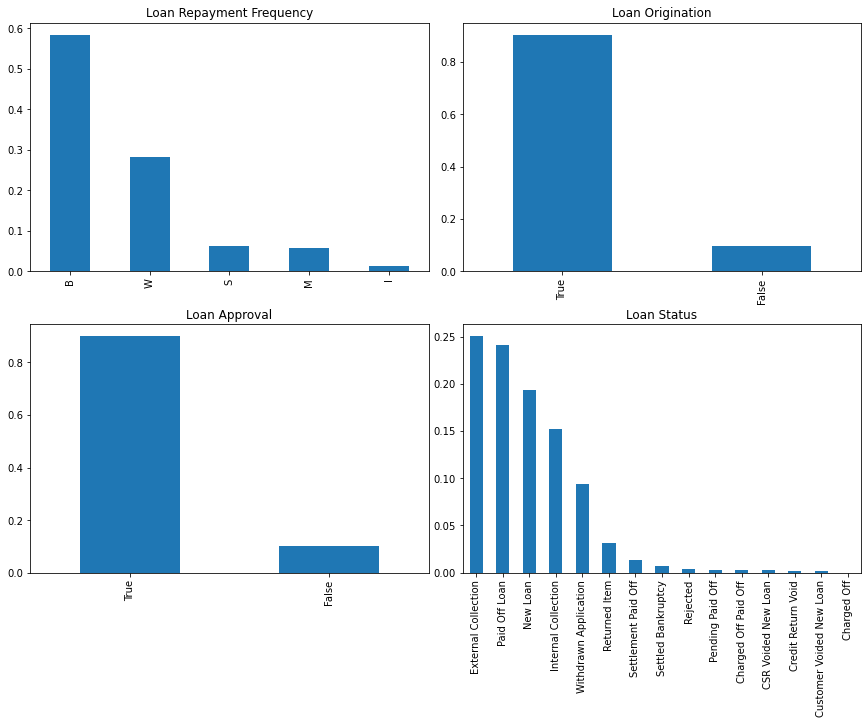

In [119]:
plt.subplot(221)
data.payFrequency.value_counts(normalize=True).plot(kind = 'bar', title = "Loan Repayment Frequency",figsize=(12,10))
plt.tight_layout(pad=0.5)

plt.subplot(222)
data.originated.value_counts(normalize=True).plot(kind = 'bar', title = "Loan Origination")
plt.tight_layout(pad=0.5)

plt.subplot(223)
data.approved.value_counts(normalize=True).plot(kind = 'bar',title = "Loan Approval")
plt.tight_layout(pad=0.5)

plt.subplot(224)
data.loanStatus.value_counts(normalize=True).plot(kind = 'bar',title = "Loan Status")
plt.tight_layout(pad=0.5)

Insight:

- About 55% - 58% applicants prefer to pay loan biweekly.

- Almost 90% applications had been originate.

- About 90% applicants got loan approval

- 25% applications were in external collection and about 24% already paid off the loan.

We will also plot the fraud scores using the histogram and group clear fraud scores of applicants into two groups which are low and high scores.

In [16]:
bins = np.linspace(min(data["clearfraudscore"]), max(data["clearfraudscore"]), 3)
bins

array([122. , 543.5, 965. ])

In [17]:
group = ['Low','High']
data['clearfraudscore-binned'] = pd.cut(data['clearfraudscore'], bins, labels=group, include_lowest=True )
data[['clearfraudscore','clearfraudscore-binned']].head(5)

,clearfraudscore,clearfraudscore-binned
0,658.0,High
1,835.0,High
2,835.0,High
3,835.0,High
4,835.0,High


Text(0.5, 1.0, 'Clear Fraud Score Bins')

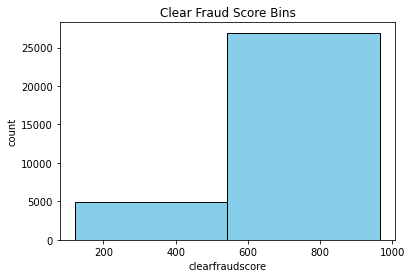

In [25]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)


plt.pyplot.hist(data["clearfraudscore"], bins = 2,color='skyblue',edgecolor='black')

plt.pyplot.xlabel("clearfraudscore")
plt.pyplot.ylabel("count")
plt.pyplot.title("Clear Fraud Score Bins")

In [19]:
print((data["clearfraudscore-binned"].value_counts())/len(data["clearfraudscore-binned"])*100)

High    84.619977
Low     15.380023
Name: clearfraudscore-binned, dtype: float64


Insight: 

- 84.4% of applicants got higher clear fraud score which are more than 543.

Next, we will find out total number of fraud indicators of applicants and group it into three groups which are low, medium and high indicators.

In [23]:
bins = np.linspace(min(data["total_fraud_indicator"]), max(data["total_fraud_indicator"]), 4)
bins

array([0.        , 2.66666667, 5.33333333, 8.        ])

In [24]:
group = ['Low','Medium','High']
data['total_fraud_indicator-binned'] = pd.cut(data['total_fraud_indicator'], bins, labels=group, include_lowest=True )
data[['total_fraud_indicator','total_fraud_indicator-binned']].head(5)

,total_fraud_indicator,total_fraud_indicator-binned
0,5.0,Medium
1,1.0,Low
2,1.0,Low
3,1.0,Low
4,1.0,Low


Text(0.5, 1.0, 'Total Fraud Indicator Bins')

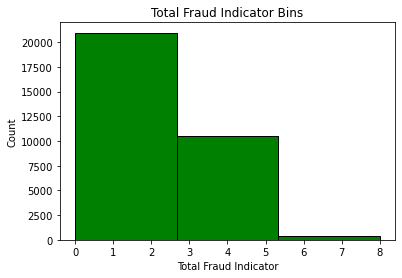

In [30]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)


plt.pyplot.hist(data["total_fraud_indicator"], bins = 3,color='green',edgecolor='black')

plt.pyplot.xlabel("Total Fraud Indicator")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Total Fraud Indicator Bins")

In [27]:
print((data["total_fraud_indicator-binned"].value_counts())/len(data["total_fraud_indicator-binned"])*100)

Low       65.827756
Medium    32.946869
High       1.225375
Name: total_fraud_indicator-binned, dtype: float64


Insight:

- 65% of applicants got lower total number of fraud indicators and only 1.2% got higher total number of fraud indicators.

We will also look at overall match code of applications. It will group into lower, medium and higher match code.

In [28]:
bins = np.linspace(min(data["overall_match_code"]), max(data["overall_match_code"]), 4)
bins

array([  1.,  34.,  67., 100.])

In [29]:
group = ['Low','Medium','High']
data['overall_match_code-binned'] = pd.cut(data['overall_match_code'], bins, labels=group, include_lowest=True )
data[['overall_match_code','overall_match_code-binned']].head(5)

,overall_match_code,overall_match_code-binned
0,1.0,Low
1,6.0,Low
2,6.0,Low
3,6.0,Low
4,6.0,Low


Text(0.5, 1.0, 'Overall Match Code Bins')

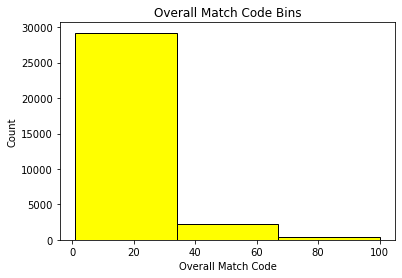

In [31]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)


plt.pyplot.hist(data["overall_match_code"], bins = 3,color='yellow',edgecolor='black')

plt.pyplot.xlabel("Overall Match Code")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Overall Match Code Bins")

In [32]:
print((data["overall_match_code-binned"].value_counts())/len(data["overall_match_code-binned"])*100)

Low       91.821409
Medium     7.204575
High       0.974016
Name: overall_match_code-binned, dtype: float64


Insight:

- 91.8% applicants in underwriting process got lower overall match codes.

## 4) Payment of Applications

In [27]:
df_payment = pd.read_csv("clean_payment_data.csv")

In [34]:
df_payment.head(3)

,loanId,installmentIndex,isCollection,principal,fees,paymentAmount,paymentStatus
0,LL-I-00000021,1,False,22.33,147.28,169.61,Checked
1,LL-I-00000021,2,False,26.44,143.17,169.61,Checked
2,LL-I-00000021,3,False,31.30,138.31,169.61,Checked


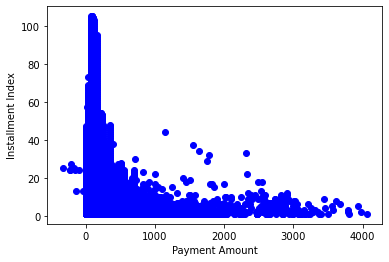

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df_payment['paymentAmount'], df_payment['installmentIndex'], c = 'blue')
plt.xlabel('Payment Amount')
plt.ylabel('Installment Index')
plt.show()

Insight:

- From plot above, we can see that applicants that did payment amount in the range 3000-4000 had installment lower than 10. 

- However, if applicants made payment lower than 500, the applicants had higher installment. From plot, many applicants prefer to make payment lower than 500.

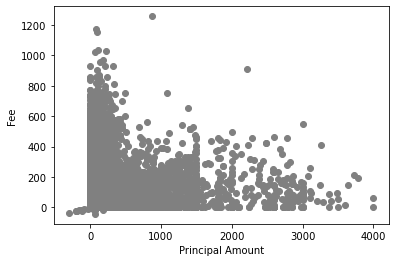

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df_payment['principal'], df_payment['fees'], c = 'gray')
plt.xlabel('Principal Amount')
plt.ylabel('Fee')
plt.show()

Insight:

- Applicants that have higher principal amount (3000 - 4000) paid lower fees (~ 200).

- However, applicants with lower principal amount, less than 500, had higher fees.

-  Many applicants had principal amount lower than 1500. 

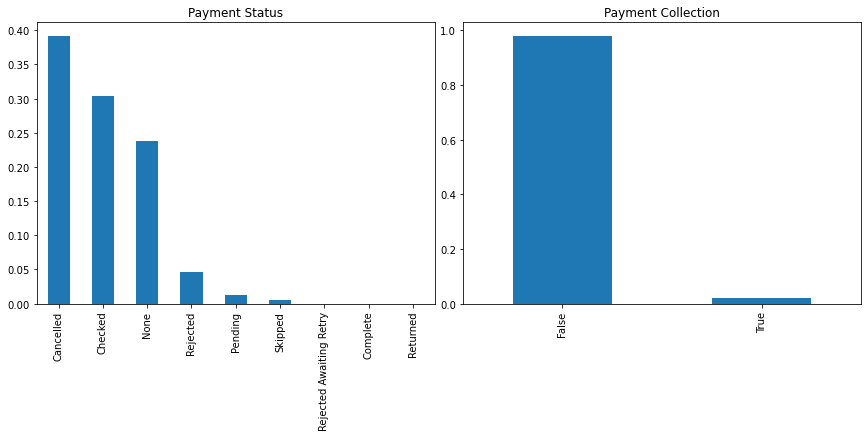

In [46]:
plt.subplot(221)
df_payment.paymentStatus.value_counts(normalize=True).plot(kind = 'bar', title = "Payment Status",figsize=(12,10))
plt.tight_layout(pad=0.5)

plt.subplot(222)
df_payment.isCollection.value_counts(normalize=True).plot(kind = 'bar', title = "Payment Collection")
plt.tight_layout(pad=0.5)


Insight: 

- About 38% applicants' payment been cancelled and 30% payment successfully checked

- About 24% applicants scheduled to make payment in the future.

- None applicants payment been returned, complete and retrying a failed ACH attempt.

- Nearly 90% - 95% applicants payment collection were FALSE which meant that the payment was not from a custom made collection plan. The applicants had not trouble making repayments as per the original schedule.

## 5) Correlation Between Variables using Heat Map

In [3]:
data = pd.read_csv("merge_loan_application.csv")

In [6]:
data.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,q1m,q10m,q1h,q24h,q7d,q15d,q30d,q90d,q365d,total_fraud_indicator,overall_match_code,clearfraudscore
count,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000,31827.000000
mean,541.149910,0.201276,0.896314,616.833263,1717.843969,13.974707,2.298929,3.337167,4.109435,4.762749,5.611776,6.380306,7.624438,11.095799,21.482735,2.162158,11.633990,680.277155
std,121.199235,0.652223,0.304857,401.150303,1142.681412,20.792092,1.478070,2.195289,2.791076,3.444169,4.235878,5.084551,6.573002,10.969372,25.005304,1.249195,14.161682,125.371370
min,29.990000,0.000000,0.000000,200.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,122.000000
25%,449.990000,0.000000,1.000000,400.000000,1070.500000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,7.000000,1.000000,1.000000,590.000000
50%,590.000000,0.000000,1.000000,500.000000,1393.930000,6.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,7.000000,13.000000,2.000000,11.000000,686.000000
75%,645.000000,0.000000,1.000000,700.000000,1958.190000,25.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,14.000000,27.000000,3.000000,12.000000,779.000000
max,681.000000,20.000000,1.000000,4375.000000,16868.150000,200.000000,14.000000,35.000000,35.000000,60.000000,64.000000,76.000000,89.000000,143.000000,438.000000,8.000000,100.000000,965.000000


In [24]:
data.columns

Index(['loanId', 'payFrequency', 'apr', 'originated', 'nPaidOff', 'approved',
       'isFunded', 'loanStatus', 'loanAmount',
       'originallyScheduledPaymentAmount', 'state', 'leadType', 'leadCost',
       'q1m', 'q10m', 'q1h', 'q24h', 'q7d', 'q15d', 'q30d', 'q90d', 'q365d',
       'total_fraud_indicator', 'overall_match_code', 'clearfraudscore'],
      dtype='object')

In [25]:
data.dtypes

loanId                               object
payFrequency                         object
apr                                 float64
originated                             bool
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
q1m                                 float64
q10m                                float64
q1h                                 float64
q24h                                float64
q7d                                 float64
q15d                                float64
q30d                                float64
q90d                                float64
q365d                               float64
total_fraud_indicator           

<AxesSubplot:>

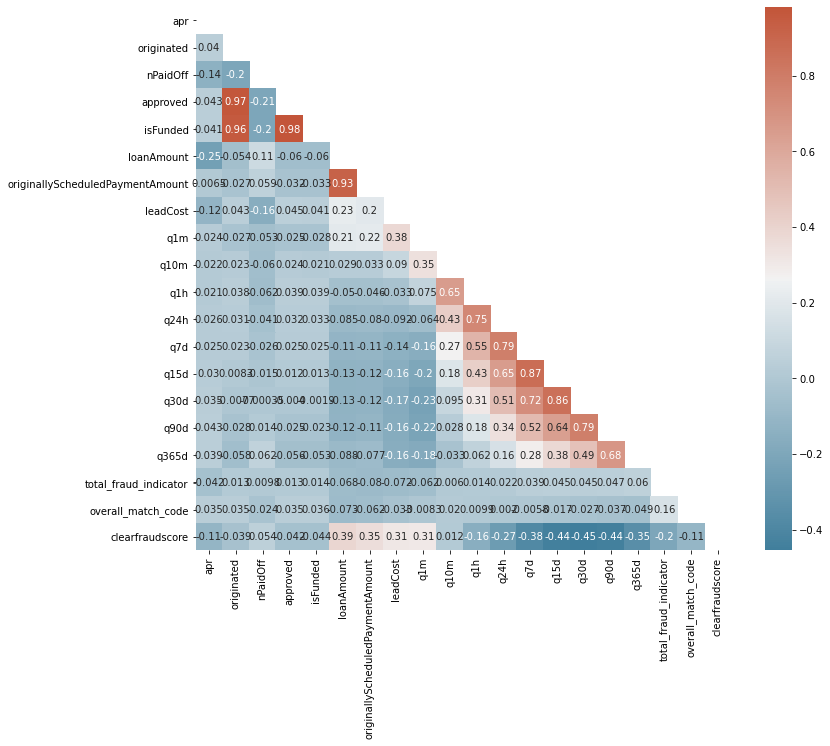

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<AxesSubplot:>

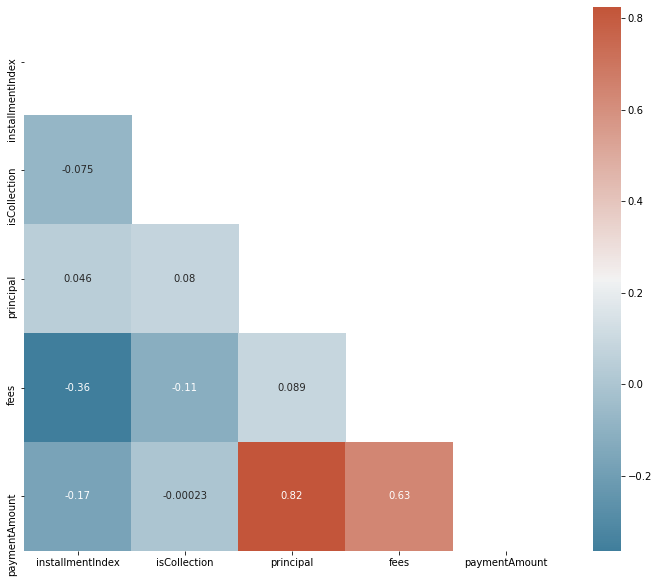

In [28]:
#correlation between variables in payment data

import matplotlib.pyplot as plt
import seaborn as sns

corr = df_payment.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## K-Means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (data without defined categories or groups).

In [29]:
import pandas as pd
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [30]:
data = pd.read_csv("merge_loan_application.csv")

- For K-mean clustering, I used three features from application data which are apr, loan amount and clear fraud score. Then, scaling these features using the standard scaling method.

In [32]:
df = data[['loanId','apr','loanAmount','clearfraudscore']] 

In [33]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
clus_df = StandardScaler().fit_transform(X)
clus_df

array([[ 0.8568678 , -0.54053722, -0.17769212],
       [-0.42203826,  1.57840261,  1.23413564],
       [-0.42203826,  1.57840261,  1.23413564],
       ...,
       [-0.76032954, -0.54053722,  1.00281923],
       [ 0.69184766, -0.04196314,  0.70769139],
       [ 0.8568678 , -0.78982426,  1.17032422]])

- Using 'elbow' technique to find the number of clusters, k. It calculates the sum of the square of the points and calculates the average distance (within cluster sum of squares)

In [34]:
wss=[]

In [35]:
for i in range(1,10):
    KM=KMeans(n_clusters=i)
    KM.fit(clus_df)
    wss.append(KM.inertia_)

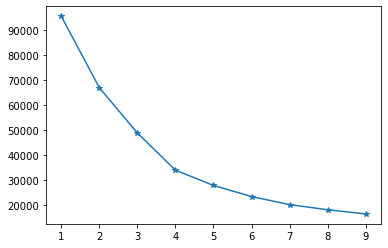

In [36]:
plt.plot(range(1,10),wss,marker='*')

- From the plot, we choosed our k = 4

In [37]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 1 ... 0 0 0]


In [38]:
df["cluster"] = labels
df.head(5)

<ipython-input-38-d3c0ee885077>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = labels


,loanId,apr,loanAmount,clearfraudscore,cluster
0,LL-I-17826953,645.0,400.0,658.0,0
1,LL-I-16519347,490.0,1250.0,835.0,1
2,LL-I-17491287,490.0,1250.0,835.0,1
3,LL-I-15679301,490.0,500.0,835.0,0
4,LL-I-12500318,490.0,500.0,835.0,0


In [39]:
clust_profile=df.drop(['loanId'],axis=1)
clust_profile=clust_profile.groupby('cluster').mean()
clust_profile['freq']=df.cluster.value_counts().sort_index()
clust_profile

,apr,loanAmount,clearfraudscore,freq
cluster,,,,
0,548.714851,441.111521,648.214531,22971
1,517.684242,1507.629773,815.588235,1938
2,212.222682,3031.753582,788.787966,349
3,539.094468,840.205663,746.711524,6569


Insight:

- Cluster 1 have the highest number of applicants with the highest average annual interest rate, the lowest loan amount and the lowest fraud score.

- Cluster 3 had the lowest average annual per rate and the highest average loan amount.

- We may say that applicants that had high loan amounts will have a low annual interest rate.

- The applicants with a low clear fraud scores will get a lower loan amount and high interest rate.

Then, we visualized the clustering:

i) Loan Amount vs apr

In [40]:
from sklearn.cluster import KMeans
import numpy as np

# k means
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(df[["loanAmount",'apr']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})

# define and map colors
colors = ['yellow','purple','skyblue','green']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1],2:colors[2], 3:colors[3]})

<ipython-input-40-b6bcdcc29ca4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df[["loanAmount",'apr']])
<ipython-input-40-b6bcdcc29ca4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
<ipython-input-40-b6bcdcc29ca4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Text(0, 0.5, 'Annual Per Rate')

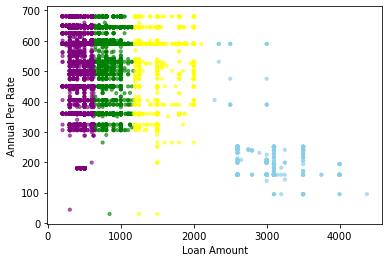

In [41]:
import matplotlib.pyplot as plt

plt.scatter(df.loanAmount, df.apr,c=df.c, alpha = 0.6, s=10)
plt.xlabel('Loan Amount', fontsize=10)
plt.ylabel('Annual Per Rate', fontsize=10)

ii) clear fraud scores vs loan amount

In [42]:
from sklearn.cluster import KMeans
import numpy as np

# k means
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['clearfraudscore','loanAmount']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})

# define and map colors
colors = ['yellow','purple','skyblue','green']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1],2:colors[2], 3:colors[3]})

<ipython-input-42-f32df9d0ce73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df[['clearfraudscore','loanAmount']])
<ipython-input-42-f32df9d0ce73>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
<ipython-input-42-f32df9d0ce73>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Text(0.5, 0, 'Loan Amount')

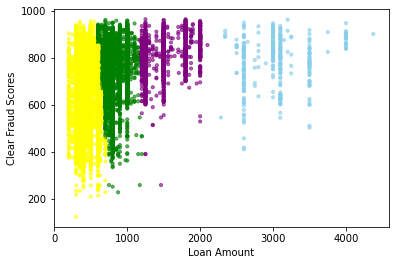

In [44]:
import matplotlib.pyplot as plt

plt.scatter( df.loanAmount,df.clearfraudscore, c=df.c, alpha = 0.6, s=10)
plt.ylabel('Clear Fraud Scores', fontsize=10)
plt.xlabel('Loan Amount', fontsize=10)

## K-Nearest Neighbor to Classify Loan Status

We will KNN model to predict loan status of applicants

In [48]:
import pandas as pd
import numpy as np

In [50]:
data = pd.read_csv("merge_loan_application.csv")

In [52]:
data.shape

(31827, 25)

- We found how many classes of the loan status.

In [53]:
pd.unique(data['loanStatus'].values.ravel())

array(['New Loan', 'Paid Off Loan', 'Internal Collection',
       'External Collection', 'Rejected', 'Withdrawn Application',
       'Returned Item', 'Pending Paid Off', 'Charged Off Paid Off',
       'CSR Voided New Loan', 'Settled Bankruptcy',
       'Customer Voided New Loan', 'Credit Return Void',
       'Settlement Paid Off', 'Charged Off'], dtype=object)

In [54]:
print("Amount of Classes: ", len(pd.unique(data['loanStatus'].values.ravel())))

Amount of Classes:  15


In [55]:
for col in data.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(data[col].unique())) )

Column loanId has 31827 unique instances
Column payFrequency has 5 unique instances
Column loanStatus has 15 unique instances
Column state has 40 unique instances
Column leadType has 9 unique instances


In [56]:
for col in data.select_dtypes(include=['bool','integer','float']).columns:
    print ("Column {} has {} unique instances".format( col, len(data[col].unique())) )

Column apr has 95 unique instances
Column originated has 2 unique instances
Column nPaidOff has 17 unique instances
Column approved has 2 unique instances
Column isFunded has 2 unique instances
Column loanAmount has 120 unique instances
Column originallyScheduledPaymentAmount has 13245 unique instances
Column leadCost has 15 unique instances
Column q1m has 13 unique instances
Column q10m has 27 unique instances
Column q1h has 33 unique instances
Column q24h has 43 unique instances
Column q7d has 53 unique instances
Column q15d has 58 unique instances
Column q30d has 74 unique instances
Column q90d has 112 unique instances
Column q365d has 211 unique instances
Column total_fraud_indicator has 9 unique instances
Column overall_match_code has 64 unique instances
Column clearfraudscore has 671 unique instances


- We would drop a few unimportant columns

In [57]:
data = data.drop('loanId', 1)
data = data.drop('state', 1)
data = data.drop('leadType', 1)

- Then, we changed categorical variables into dummy variables

In [58]:
data = data.astype({"originated": 'str', "approved": 'str'})

In [59]:
data.select_dtypes(include=['object']).columns

Index(['payFrequency', 'originated', 'approved', 'loanStatus'], dtype='object')

In [60]:
X = data.drop("loanStatus", axis=1, inplace = False)
y = data.loanStatus

In [61]:
def model_matrix(df , columns):
    dummified_cols = pd.get_dummies(df[columns])
    df = df.drop(columns, axis = 1, inplace=False)
    df_new = df.join(dummified_cols)
    return df_new

X = model_matrix(X, ['payFrequency', 'originated', 'approved'])

In [62]:
X.head()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,q1m,q10m,q1h,q24h,...,clearfraudscore,payFrequency_B,payFrequency_I,payFrequency_M,payFrequency_S,payFrequency_W,originated_False,originated_True,approved_False,approved_True
0,645.0,0.0,1,400.0,1364.87,40,3.0,3.0,3.0,3.0,...,658.0,0,0,0,0,1,0,1,0,1
1,490.0,2.0,1,1250.0,3313.78,0,1.0,1.0,4.0,4.0,...,835.0,0,0,0,1,0,0,1,0,1
2,490.0,3.0,1,1250.0,3112.16,0,1.0,1.0,4.0,4.0,...,835.0,0,0,0,1,0,0,1,0,1
3,490.0,1.0,1,500.0,1292.09,0,1.0,1.0,4.0,4.0,...,835.0,0,0,0,1,0,0,1,0,1
4,490.0,0.0,1,500.0,1271.81,6,1.0,1.0,4.0,4.0,...,835.0,0,0,0,1,0,0,1,0,1


- We scaled the continuous variables using a standard scaler.

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
data.select_dtypes(include=['int','float']).columns

Index(['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount',
       'q1m', 'q10m', 'q1h', 'q24h', 'q7d', 'q15d', 'q30d', 'q90d', 'q365d',
       'total_fraud_indicator', 'overall_match_code', 'clearfraudscore'],
      dtype='object')

In [65]:
Scaler = StandardScaler()
X[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount','q1m', 'q10m', 'q1h', 'q24h', 'q7d', 'q15d', 'q30d', 'q90d', 'q365d','total_fraud_indicator', 'overall_match_code', 'clearfraudscore']] = Scaler.fit_transform(X[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount','q1m', 'q10m', 'q1h', 'q24h', 'q7d', 'q15d', 'q30d', 'q90d', 'q365d','total_fraud_indicator', 'overall_match_code', 'clearfraudscore']])

In [66]:
X.head()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,q1m,q10m,q1h,q24h,...,clearfraudscore,payFrequency_B,payFrequency_I,payFrequency_M,payFrequency_S,payFrequency_W,originated_False,originated_True,approved_False,approved_True
0,0.856868,-0.308604,1,-0.540537,-0.308905,40,0.474323,-0.153589,-0.39750,-0.511815,...,-0.177692,0,0,0,0,1,0,1,0,1
1,-0.422038,2.757879,1,1.578403,1.396681,0,-0.878814,-1.064645,-0.03921,-0.221464,...,1.234136,0,0,0,1,0,0,1,0,1
2,-0.422038,4.291120,1,1.578403,1.220233,0,-0.878814,-1.064645,-0.03921,-0.221464,...,1.234136,0,0,0,1,0,0,1,0,1
3,-0.422038,1.224637,1,-0.291250,-0.372598,0,-0.878814,-1.064645,-0.03921,-0.221464,...,1.234136,0,0,0,1,0,0,1,0,1
4,-0.422038,-0.308604,1,-0.291250,-0.390346,6,-0.878814,-1.064645,-0.03921,-0.221464,...,1.234136,0,0,0,1,0,0,1,0,1


- We split the data into the train and test data, 70% train data and 30% test data

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [68]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

- For metric measurement, we used euclidean distance

In [69]:
data_knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
data_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [70]:
data_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

- We found confusion metric for KNN model

In [71]:
# confusion matrix
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = data_knn.predict(x_test))
print("The Confusion matrix:\n", knn_confusion_matrix)

The Confusion matrix:
 [[   0    0    0    0    1    2    3    0    0    0    0    0    0   16]
 [   0    0    0    0   17    3    3   12    0    0    0    0    0    0]
 [   0    0    0    0    4    5    5    2    0    0    0    0    0    0]
 [   1    0    0    0    5    1    0    5    0    0    0    0    0    2]
 [   0    0    0    0 1318  240  265  563    0    0    3    0    0    0]
 [   0    0    0    0  413  404  456  167    0    0    6    0    0    0]
 [   0    0    0    0  352  436  741  255    0    0    6    0    0    1]
 [   0    0    0    0  850  198  310  957    0    0    2    0    0    2]
 [   0    0    0    0    4    4    8    9    0    0    0    0    0    0]
 [   0    0    0    0    8    2    0    1    0    0    0    0    0   22]
 [   0    0    0    0   60   82  123   40    0    0    1    0    0    0]
 [   0    0    0    0   33    7   12   27    0    0    0    0    0    0]
 [   0    0    0    0   68   12   10   54    0    0    0    0    0    0]
 [   1    0    0    0   53  

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

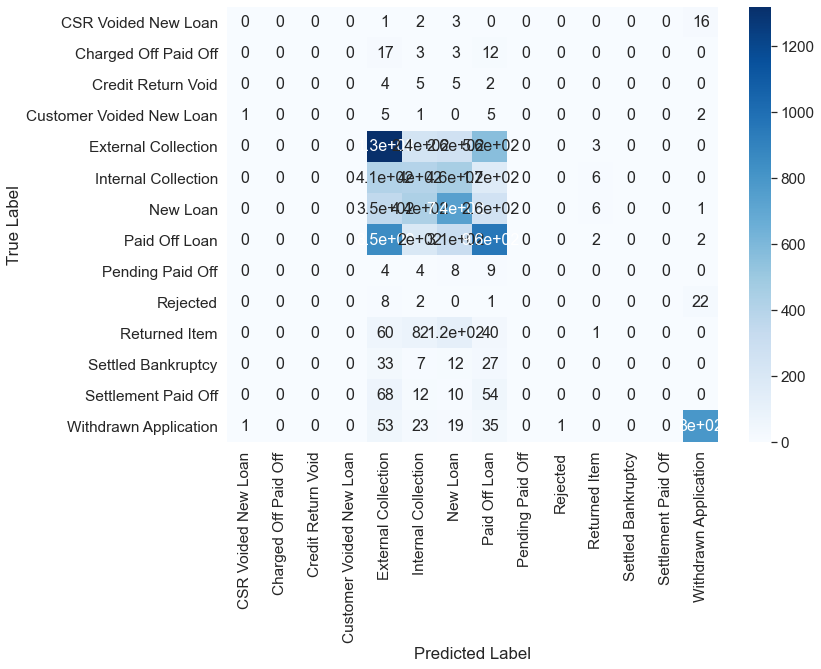

In [72]:
# visualize the confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true = y_test
y_pred = data_knn.predict(x_test)

data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted Label'
plt.figure(figsize = (11,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

- We used Rsquared for prediction error for train and test data.

In [73]:
# R-square from training and test data
rsquared_train = data_knn.score(x_train, y_train)
rsquared_test = data_knn.score(x_test, y_test)
print ('Training data R-squared:')
print(rsquared_train)
print ('Test data R-squared:')
print(rsquared_test)

Training data R-squared:
0.5434509381452554
Test data R-squared:
0.44182636925332497


In [76]:
from sklearn.metrics import classification_report
knn_classify_report = classification_report(y_true = y_test, 
                                           y_pred = data_knn.predict(x_test))
print(knn_classify_report)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

     CSR Voided New Loan       0.00      0.00      0.00        22
    Charged Off Paid Off       0.00      0.00      0.00        35
      Credit Return Void       0.00      0.00      0.00        16
Customer Voided New Loan       0.00      0.00      0.00        14
     External Collection       0.41      0.55      0.47      2389
     Internal Collection       0.28      0.28      0.28      1446
                New Loan       0.38      0.41      0.40      1791
           Paid Off Loan       0.45      0.41      0.43      2319
        Pending Paid Off       0.00      0.00      0.00        25
                Rejected       0.00      0.00      0.00        33
           Returned Item       0.06      0.00      0.01       306
      Settled Bankruptcy       0.00      0.00      0.00        79
     Settlement Paid Off       0.00      0.00      0.00       144
   Withdrawn Application       0.95      0.86      0.90       930

        

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Precision meant how precise/accurate the model is out of those predicted positive, how many of them are actual positive.

- Recall actually calculated how many of the Actual Positives the model captured through labeling it as Positive (True Positive)

- The F-score is a way of combining the precision and recall of the model, a function of Precision and Recall.

## Decision Tree for Loan Approval

We would predict loan approval of applicants using decision tree model.

In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [79]:
data = pd.read_csv("merge_loan_application.csv")

In [81]:
data.head(3)

,loanId,payFrequency,apr,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,q1h,q24h,q7d,q15d,q30d,q90d,q365d,total_fraud_indicator,overall_match_code,clearfraudscore
0,LL-I-17826953,W,645.0,True,0.0,True,1,New Loan,400.0,1364.87,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,1.0,658.0
1,LL-I-16519347,S,490.0,True,2.0,True,1,Paid Off Loan,1250.0,3313.78,...,4.0,4.0,4.0,4.0,4.0,5.0,10.0,1.0,6.0,835.0
2,LL-I-17491287,S,490.0,True,3.0,True,1,Paid Off Loan,1250.0,3112.16,...,4.0,4.0,4.0,4.0,4.0,5.0,10.0,1.0,6.0,835.0


In [82]:
data = data.drop(['loanId'], axis = 1)

In [85]:
data.columns

Index(['payFrequency', 'apr', 'originated', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'q1m', 'q10m', 'q1h', 'q24h', 'q7d', 'q15d',
       'q30d', 'q90d', 'q365d', 'total_fraud_indicator', 'overall_match_code',
       'clearfraudscore'],
      dtype='object')

In [86]:
data = data[['payFrequency','nPaidOff', 'leadType', 'q365d', 'total_fraud_indicator', 'overall_match_code',
       'clearfraudscore','approved']]

In [87]:
data = data.astype({"approved": 'str'})

In [88]:
data.head()

,payFrequency,nPaidOff,leadType,q365d,total_fraud_indicator,overall_match_code,clearfraudscore,approved
0,W,0.0,lead,3.0,5.0,1.0,658.0,True
1,S,2.0,organic,10.0,1.0,6.0,835.0,True
2,S,3.0,organic,10.0,1.0,6.0,835.0,True
3,S,1.0,organic,10.0,1.0,6.0,835.0,True
4,S,0.0,bvMandatory,10.0,1.0,6.0,835.0,True


In [89]:
X = data[['payFrequency','nPaidOff','leadType','q365d','total_fraud_indicator','overall_match_code','clearfraudscore']].values
X[0:6]

array([['W', 0.0, 'lead', 3.0, 5.0, 1.0, 658.0],
       ['S', 2.0, 'organic', 10.0, 1.0, 6.0, 835.0],
       ['S', 3.0, 'organic', 10.0, 1.0, 6.0, 835.0],
       ['S', 1.0, 'organic', 10.0, 1.0, 6.0, 835.0],
       ['S', 0.0, 'bvMandatory', 10.0, 1.0, 6.0, 835.0],
       ['B', 0.0, 'bvMandatory', 255.0, 2.0, 1.0, 624.0]], dtype=object)

- We changed categorical variables to dummy variable

In [90]:
from sklearn import preprocessing

le1 = preprocessing.LabelEncoder()
le1.fit(['B', 'W', 'S', 'M', 'I'])
X[:,0] = le1.transform(X[:,0]) 


le2 = preprocessing.LabelEncoder()
le2.fit(['prescreen', 'lead', 'organic', 'bvMandatory', 'rc_returning',
       'california', 'instant-offer', 'express', 'lionpay', 'repeat'])
X[:,2] = le2.transform(X[:,2])

X[0:6]

array([[4, 0.0, 4, 3.0, 5.0, 1.0, 658.0],
       [3, 2.0, 6, 10.0, 1.0, 6.0, 835.0],
       [3, 3.0, 6, 10.0, 1.0, 6.0, 835.0],
       [3, 1.0, 6, 10.0, 1.0, 6.0, 835.0],
       [3, 0.0, 0, 10.0, 1.0, 6.0, 835.0],
       [0, 0.0, 0, 255.0, 2.0, 1.0, 624.0]], dtype=object)

In [91]:
y = data["approved"]
y[0:5]

0    True
1    True
2    True
3    True
4    True
Name: approved, dtype: object

- Splitting the data into the train and test data, 70% train data and 30% test data

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

- Decision tree algorithms used information gain to split a node. We would selected entropy as the criteria for calculating information gain.

In [94]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [95]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

- We found accuracy scores of decision tree model. Accuracy score meant the set of labels predicted in prediction must exactly match the corresponding set of labels in true label.

In [96]:
predTree = Tree.predict(X_test)

In [97]:
print (predTree [0:10])
print (y_test [0:10])

['True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True']
18002    False
25341     True
30442     True
16528     True
28626     True
13109     True
27907     True
13227     True
4428      True
25869     True
Name: approved, dtype: object


In [98]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9020839878521311


Then, we could visualized our decision tree.

In [99]:
import numpy as np
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [100]:
dot_data = StringIO()
filename = "Loan Approval Decision Tree.png"
featureNames = data.columns[0:7]
targetNames = data["approved"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(300, 400))
plt.imshow(img,interpolation='nearest')